In [1]:
import numpy as np
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Bootstrap signifikanz test

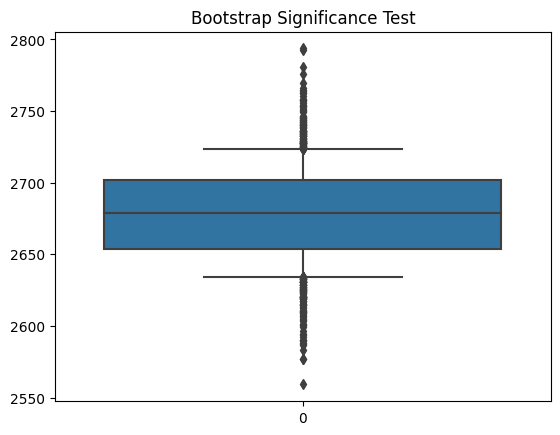

In [47]:
models =["ACCESS-CM2"]#, "ACCESS-ESM1", "CESM2-WACCM", "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", 
         #"GFDL-CM4", "GFDL-ESM4","HadGEM3-GC31-LL", "INM-CM4-8", "INM-CM5-0", "IPSL-CM6A-LR", "MIROC6", 
        # "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", "MRI-ESM2-0", "NorESM2-MM", "UKESM1-0-LL"]
area="-90_90"
zusatz="unnorm_projectedpattern"
for model in models:
    data_hist = np.loadtxt("N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_"+model+"_1985-2014.N_mjjaso_atrbg_aacrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_"+zusatz+"_5cluster_10PC_cl1_dates") # samples must be in a sequence
    data_fut = np.loadtxt("N:/atm_glomod/user/jomuel001/CMIP6_models/"+model+"/AREA."+area+"_89.7849_29.0866/CLUSTER/KMEANSslp_hpa_"+model+"_2070-2099.N_mjjaso_atrbg_aacHrm21_remapbnds_proj_on_EOF_ERA51985-2014slp_hpa_ERA5_1985-2014_mjjaso_atrbg_aacrm21_remapbnds_"+zusatz+"_5cluster_10PC_cl1_dates")  # samples must be in a sequence
    data = np.concatenate((data_hist, data_fut))
    #data = (data, )
    whisker_percentiles = [10, 90]

    # calculate the bootstrap distribution
    bootstrap_dist = []
    num_bootstraps = 1000
    for i in range(num_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_statistic = np.mean(bootstrap_sample)
        bootstrap_dist.append(bootstrap_statistic)

    # calculate the percentiles of the bootstrap distribution
    whisker_values = np.percentile(bootstrap_dist, whisker_percentiles)

    # create the boxplot
    sns.boxplot(data=bootstrap_dist, whis=whisker_percentiles)

    # add vertical lines at the whisker values
    #for whisker_value in whisker_values:
     #   plt.axvline(x=whisker_value, color='red')

    # add a title to the plot
    plt.title('Bootstrap Significance Test')

    # show the plot
    plt.show()